In [1]:
%pylab inline
import pandas as pd
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [78]:
data=loadtxt('./CO120.dat')

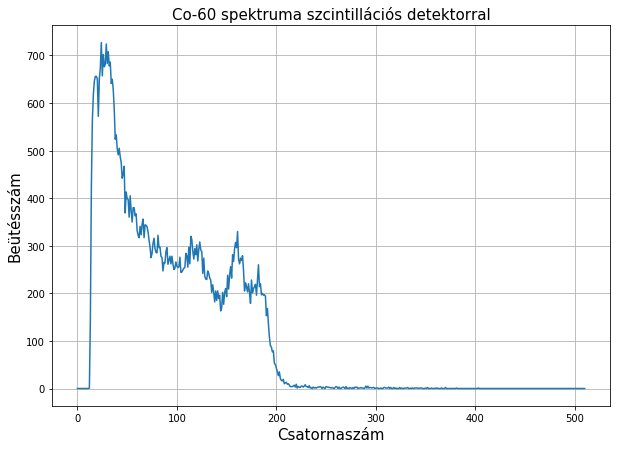

In [6]:
figsize(10,7)
plot(data)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
grid(True)
title('Co-60 spektruma szcintillációs detektorral',fontsize=15)
#savefig('./COszcint_spec.png',bbox_inches='tight')

In [79]:
data2=loadtxt('./CS120.dat')

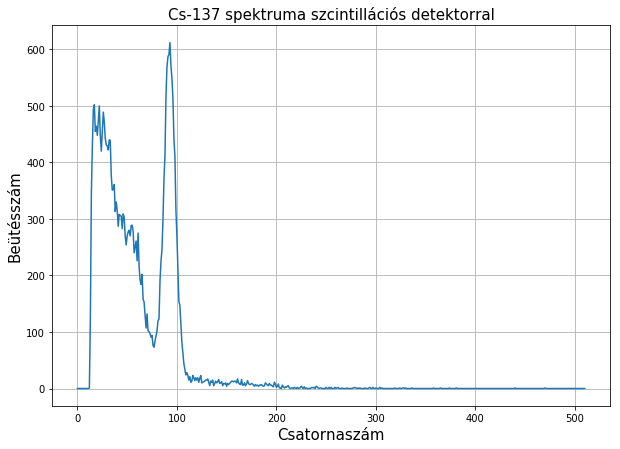

In [9]:
figsize(10,7)
plot(data2)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
grid(True)
title('Cs-137 spektruma szcintillációs detektorral',fontsize=15)
#savefig('./Csszcint_spec.png',bbox_inches='tight')

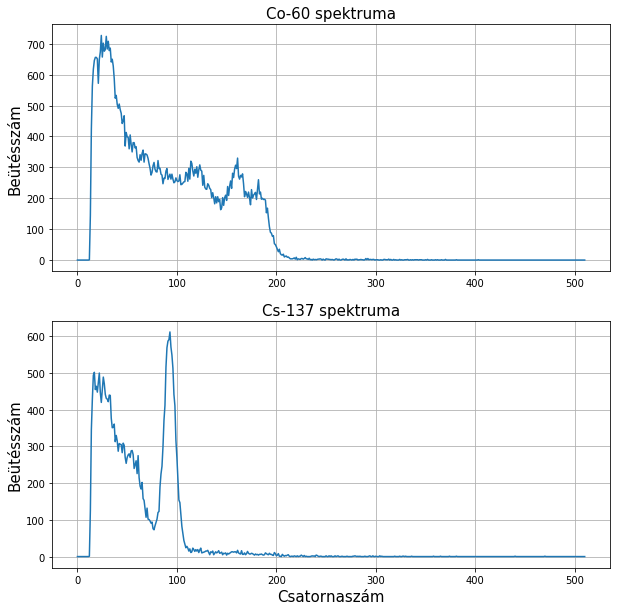

In [80]:
figsize(10,10)
fig,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(data)
#ax1.set_xlabel('Csatornaszám',fontsize=15)
ax1.set_ylabel('Beütésszám',fontsize=15)
ax1.grid(True)
ax1.set_title('Co-60 spektruma',fontsize=15)
ax2.plot(data2)
ax2.set_xlabel('Csatornaszám',fontsize=15)
ax2.set_ylabel('Beütésszám',fontsize=15)
ax2.grid(True)
ax2.set_title('Cs-137 spektruma',fontsize=15)
savefig('./szc_spekt.png',bbox_inches='tight')

In [95]:
def gauss(x,a,x0,sigma,c):
    return a*exp(-(x-x0)**2/(2*sigma**2))+c

In [117]:
mpoints=linspace(0,len(data),len(data)+1)
roi1=vstack((mpoints[147:171],data[147:171])).T
roi2=vstack((mpoints[173:190],data[173:190])).T
roi3=vstack((mpoints[75:109],data2[75:109])).T

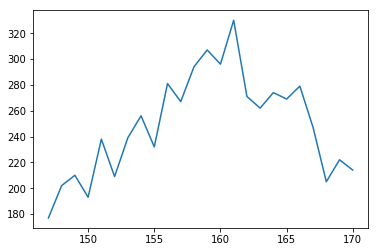

In [9]:
plot(roi1[:,0],roi1[:,1])

In [10]:
popt1,pcov1 = curve_fit(gauss,roi1[:,0],roi1[:,1],p0=[140,160,5,180])
popt1,pcov1

(array([ 115.61906963,  160.28593276,    5.74020064,  182.75404508]),
 array([[  3.26447950e+02,  -1.11612655e+00,   1.50142687e+01,
          -3.24566401e+02],
        [ -1.11612655e+00,   1.60224191e-01,  -4.57828071e-02,
           1.17147009e+00],
        [  1.50142687e+01,  -4.57828071e-02,   1.18821528e+00,
          -1.94633681e+01],
        [ -3.24566401e+02,   1.17147009e+00,  -1.94633681e+01,
           3.76774701e+02]]))

In [11]:
for i in range (4):
    print(sqrt(pcov1[i,i]))

18.0678706663
0.400280141075
1.09005287751
19.4106852196


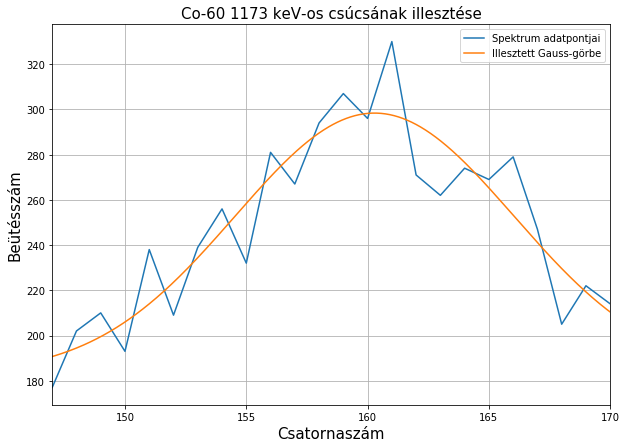

In [12]:
figsize(10,7)
mm=linspace(145,175,1000)
plot(roi1[:,0],roi1[:,1],label='Spektrum adatpontjai')
plot(mm, gauss(mm, *popt1),label='Illesztett Gauss-görbe')
xlim(147,170)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('Co-60 1173 keV-os csúcsának illesztése',fontsize=15)
plt.legend()
grid(True)
#savefig('./Co60_1csucs.png', bbox_inches='tight')

In [15]:
2.36*popt1[2]

13.546873509851629

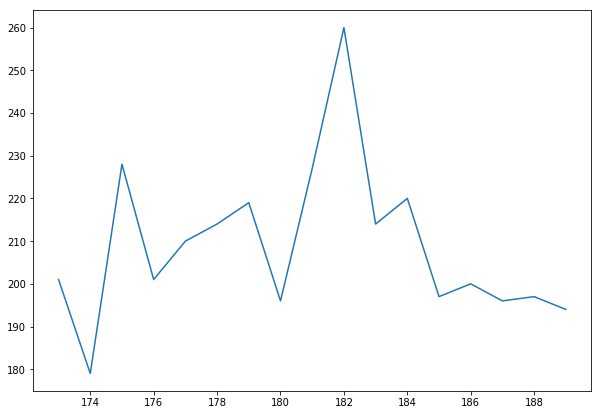

In [118]:
plot(roi2[:,0],roi2[:,1])

In [17]:
popt2,pcov2 = curve_fit(gauss,roi2[:,0],roi2[:,1],p0=[60,182,2,200])
popt2,pcov2

(array([  57.92684606,  181.84915591,    0.61594867,  203.96465893]),
 array([[  1.22713016e+02,  -4.77455048e-01,  -5.95686881e-01,
          -7.40269618e+00],
        [ -4.77455048e-01,   2.91369476e-02,   8.89235158e-03,
          -3.97584121e-02],
        [ -5.95686881e-01,   8.89235158e-03,   1.90136460e-02,
          -1.29987880e-01],
        [ -7.40269618e+00,  -3.97584121e-02,  -1.29987880e-01,
           9.11747405e+00]]))

In [132]:
2.36*0.61594867*7.522

10.9342715139464

In [134]:
0.61594867*2.36

1.4536388612

In [18]:
for i in range (4):
    print(sqrt(pcov2[i,i]))

11.0775906914
0.170695482218
0.137889977751
3.01951553223


In [133]:
0.329*7.522

2.4747380000000003

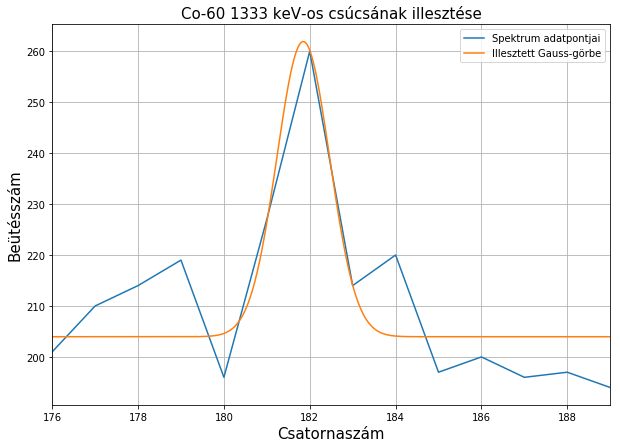

In [19]:
figsize(10,7)
mm=linspace(176,189,1000)
plot(roi2[:,0],roi2[:,1],label='Spektrum adatpontjai')
plot(mm, gauss(mm, *popt2),label='Illesztett Gauss-görbe')
xlim(176,189)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('Co-60 1333 keV-os csúcsának illesztése',fontsize=15)
plt.legend()
grid(True)
#savefig('./Co60_2csucs.png', bbox_inches='tight')

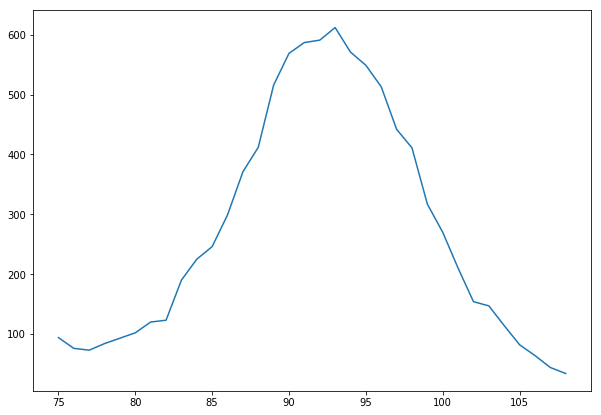

In [20]:
plot(roi3[:,0],roi3[:,1])

In [21]:
popt3,pcov3 = curve_fit(gauss,roi3[:,0],roi3[:,1],p0=[500,93,15,100])
popt3,pcov3

(array([ 547.9312056 ,   92.55709727,    5.2911403 ,   60.27595626]),
 array([[  7.08796124e+01,  -2.61197517e-03,   1.28641533e-01,
          -3.27070474e+01],
        [ -2.61197517e-03,   5.84954774e-03,  -4.16018977e-05,
           3.38728036e-03],
        [  1.28641533e-01,  -4.16018977e-05,   1.36945845e-02,
          -5.93195539e-01],
        [ -3.27070474e+01,   3.38728036e-03,  -5.93195539e-01,
           4.49124533e+01]]))

In [22]:
for i in range (4):
    print(sqrt(pcov3[i,i]))

8.41900305016
0.0764823361378
0.117023862772
6.70167541273


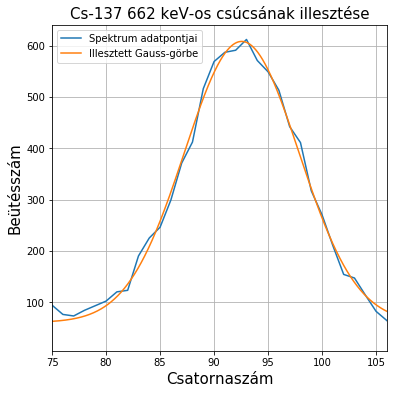

In [134]:
figsize(6,6)
mm=linspace(75,106,1000)
plot(roi3[:,0],roi3[:,1],label='Spektrum adatpontjai')
plot(mm, gauss(mm, *popt3),label='Illesztett Gauss-görbe')
xlim(75,106)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('Cs-137 662 keV-os csúcsának illesztése',fontsize=15)
plt.legend()
grid(True)
#savefig('./Cs137_1csucs_kicsi.png', bbox_inches='tight')

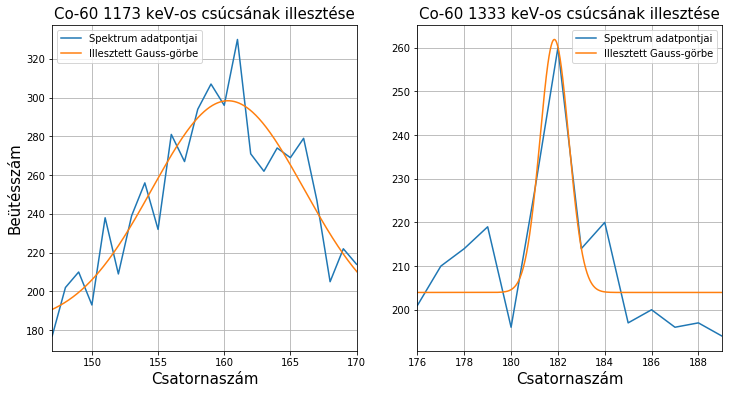

In [132]:
figsize(12,6)
fig, (ax1, ax2)= plt.subplots(1,2)
mm=linspace(145,175,1000)
ax1.plot(roi1[:,0],roi1[:,1],label='Spektrum adatpontjai')
ax1.plot(mm, gauss(mm, *popt1),label='Illesztett Gauss-görbe')
ax1.set_xlim(147,170)
ax1.set_xlabel('Csatornaszám',fontsize=15)
ax1.set_ylabel('Beütésszám',fontsize=15)
ax1.set_title('Co-60 1173 keV-os csúcsának illesztése',fontsize=15)
ax1.legend()
ax1.grid(True)

mm=linspace(176,189,1000)
ax2.plot(roi2[:,0],roi2[:,1],label='Spektrum adatpontjai')
ax2.plot(mm, gauss(mm, *popt2),label='Illesztett Gauss-görbe')
ax2.set_xlim(176,189)
ax2.set_xlabel('Csatornaszám',fontsize=15)
#ax2.set_ylabel('Beütésszám',fontsize=15)
ax2.set_title('Co-60 1333 keV-os csúcsának illesztése',fontsize=15)
ax2.legend()
ax2.grid(True)

#savefig('./Cob_figs.png',bbox_inches='tight')

In [87]:
data3=loadtxt('./Gam_hpg.dat')

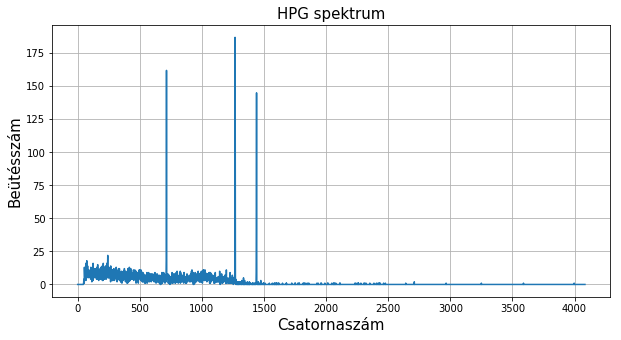

In [91]:
figsize(10,5)
plot(data3)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
grid(True)
title('HPG spektrum',fontsize=15)
#savefig('./Hpg.png',bbox_inches='tight')

In [92]:
mpoints2=linspace(0,len(data3),len(data3)+1)
roi4=vstack((mpoints2[706:722],data3[706:722])).T
roi5=vstack((mpoints2[1257:1278],data3[1257:1278])).T
roi6=vstack((mpoints2[1432:1446],data3[1432:1446])).T

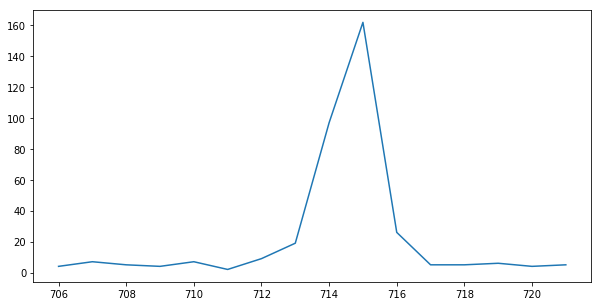

In [93]:
plot(roi4[:,0],roi4[:,1])

In [96]:
popt4,pcov4 = curve_fit(gauss,roi4[:,0],roi4[:,1],p0=[150,715,2,10])
popt4,pcov4

(array([  1.72539026e+02,   7.14709818e+02,   6.35944424e-01,
          5.75040727e+00]),
 array([[  1.76139803e+01,  -2.65479970e-02,  -5.33209564e-02,
          -3.07706474e-01],
        [ -2.65479970e-02,   2.91302996e-04,   1.59738634e-04,
          -1.70512605e-03],
        [ -5.33209564e-02,   1.59738634e-04,   3.98166890e-04,
          -5.49012444e-03],
        [ -3.07706474e-01,  -1.70512605e-03,  -5.49012444e-03,
           7.99656170e-01]]))

In [111]:
for i in range (4):
    print(sqrt(pcov4[i,i]))

4.19690127608
0.017067600761
0.0199541196215
0.894234963305


In [97]:
sqrt(0.0002913)

0.017067512999848572

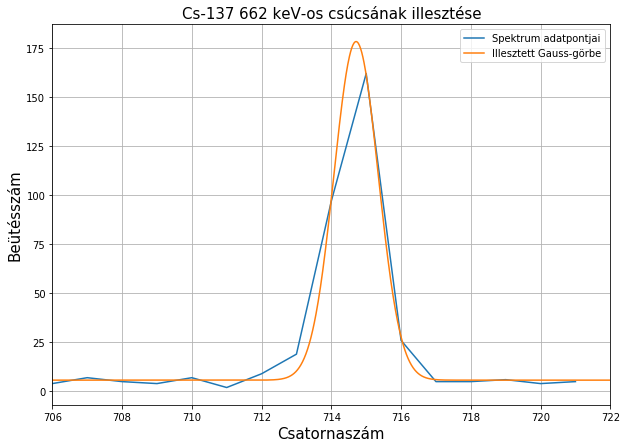

In [114]:
figsize(10,7)
mm=linspace(706,722,1000)
plot(roi4[:,0],roi4[:,1],label='Spektrum adatpontjai')
plot(mm, gauss(mm, *popt4),label='Illesztett Gauss-görbe')
xlim(706,722)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('Cs-137 662 keV-os csúcsának illesztése',fontsize=15)
plt.legend()
grid(True)
savefig('./Cs137_1csucs_hpg.png', bbox_inches='tight')

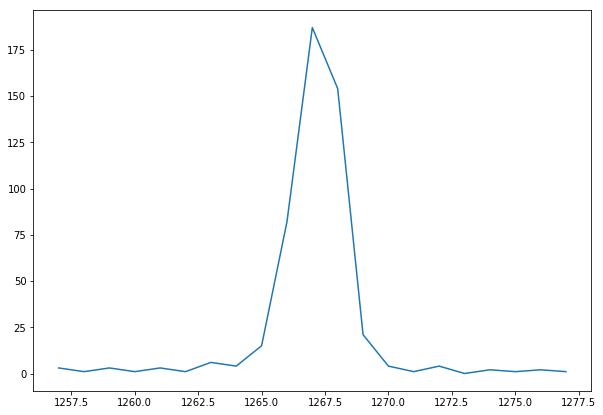

In [99]:
plot(roi5[:,0],roi5[:,1])

In [112]:
popt5,pcov5 = curve_fit(gauss,roi5[:,0],roi5[:,1],p0=[180,1267.5,4,10])
popt5,pcov5

(array([  1.99210885e+02,   1.26726305e+03,  -9.09189973e-01,
          1.99991155e+00]),
 array([[  1.98877127e+01,   1.44615939e-03,   5.29865810e-02,
          -8.98363015e-01],
        [  1.44615939e-03,   5.33460901e-04,   1.35918115e-05,
           1.66259508e-04],
        [  5.29865810e-02,   1.35918115e-05,   5.90058609e-04,
           8.28033419e-03],
        [ -8.98363015e-01,   1.66259508e-04,   8.28033419e-03,
           1.27715556e+00]]))

In [113]:
for i in range (4):
    print(sqrt(pcov5[i,i]))

4.4595641794
0.0230967725299
0.0242911220297
1.13011307259


In [101]:
sqrt(0.00053346)

0.023096753018552196

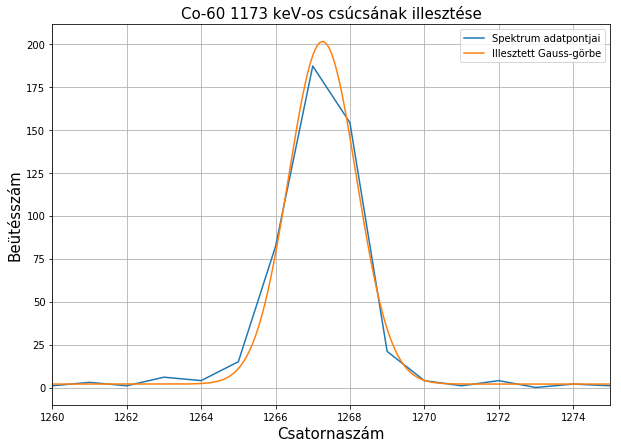

In [102]:
figsize(10,7)
mm=linspace(1260,1275,1000)
plot(roi5[:,0],roi5[:,1],label='Spektrum adatpontjai')
plot(mm, gauss(mm, *popt5),label='Illesztett Gauss-görbe')
xlim(1260,1275)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('Co-60 1173 keV-os csúcsának illesztése',fontsize=15)
plt.legend()
grid(True)
#savefig('./Co60_1csucs_hpg.png', bbox_inches='tight')

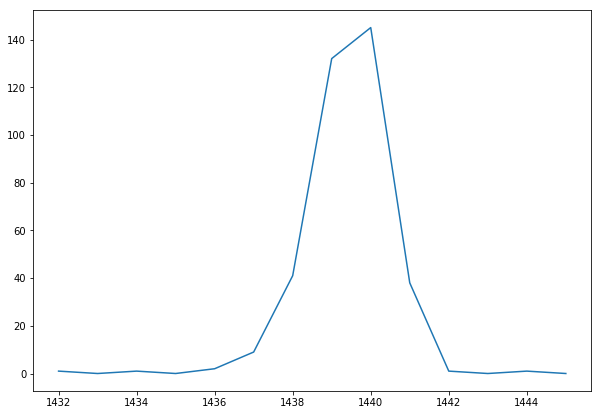

In [103]:
plot(roi6[:,0],roi6[:,1])

In [104]:
popt6,pcov6 = curve_fit(gauss,roi6[:,0],roi6[:,1],p0=[140,1440,4,10])
popt6, pcov6

(array([  1.61513407e+02,   1.43953197e+03,   8.85595199e-01,
          8.90236519e-01]),
 array([[  1.04741375e+01,  -2.49065101e-04,  -3.27878588e-02,
          -7.12621230e-01],
        [ -2.49065101e-04,   3.81973930e-04,   3.10781741e-06,
          -5.03858428e-05],
        [ -3.27878588e-02,   3.10781741e-06,   4.94138343e-04,
          -9.09082127e-03],
        [ -7.12621230e-01,  -5.03858428e-05,  -9.09082127e-03,
           1.09688635e+00]]))

In [115]:
for i in range (4):
    print(sqrt(pcov6[i,i]))

3.23637722483
0.0195441533364
0.022229222722
1.04732341959


In [135]:
8.85595199e-01*2.36*0.926

1.93534432408664

In [136]:
0.022229*2.36*0.926

0.04857836744

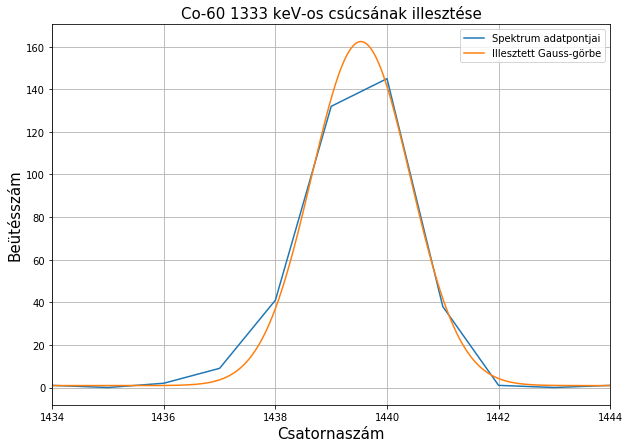

In [106]:
figsize(10,7)
mm=linspace(1434,1444,1000)
plot(roi6[:,0],roi6[:,1],label='Spektrum adatpontjai')
plot(mm, gauss(mm, *popt6),label='Illesztett Gauss-görbe')
xlim(1434,1444)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('Co-60 1333 keV-os csúcsának illesztése',fontsize=15)
plt.legend()
grid(True)
#savefig('./Co60_2csucs_hpg.png', bbox_inches='tight')

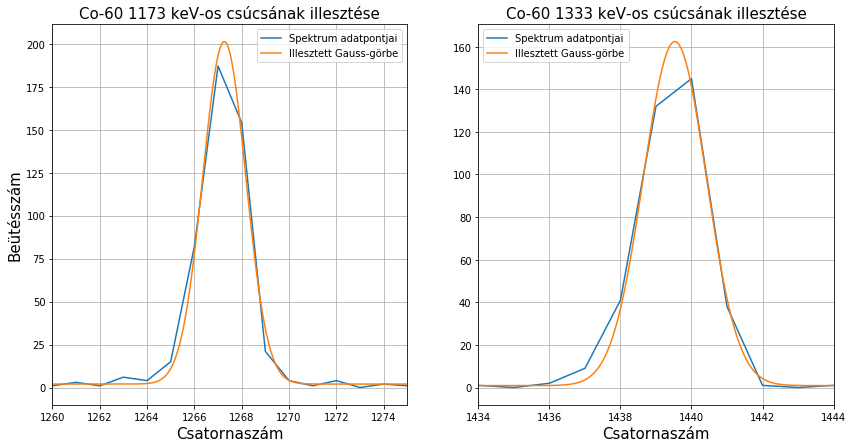

In [110]:
figsize(14,7)
fig, (ax1, ax2)= plt.subplots(1,2)
mm=linspace(1260,1275,1000)
ax1.plot(roi5[:,0],roi5[:,1],label='Spektrum adatpontjai')
ax1.plot(mm, gauss(mm, *popt5),label='Illesztett Gauss-görbe')
ax1.set_xlim(1260,1275)
ax1.set_xlabel('Csatornaszám',fontsize=15)
ax1.set_ylabel('Beütésszám',fontsize=15)
ax1.set_title('Co-60 1173 keV-os csúcsának illesztése',fontsize=15)
ax1.legend()
ax1.grid(True)

mm=linspace(1434,1444,1000)
ax2.plot(roi6[:,0],roi6[:,1],label='Spektrum adatpontjai')
ax2.plot(mm, gauss(mm, *popt6),label='Illesztett Gauss-görbe')
ax2.set_xlim(1434,1444)
ax2.set_xlabel('Csatornaszám',fontsize=15)
#ax2.set_ylabel('Beütésszám',fontsize=15)
ax2.set_title('Co-60 1333 keV-os csúcsának illesztése',fontsize=15)
ax2.legend()
ax2.grid(True)

savefig('./Co_hpg.png',bbox_inches='tight')

# Kalibráció

### Szcintillációs

In [82]:
mid=[160.286,181.849,92.557]
m_err=[0.400,0.171,0.074]
energ=[1173,1333,662]

In [83]:
z=polyfit(mid,energ,1)

In [84]:
z

array([  7.52189736, -33.9028695 ])

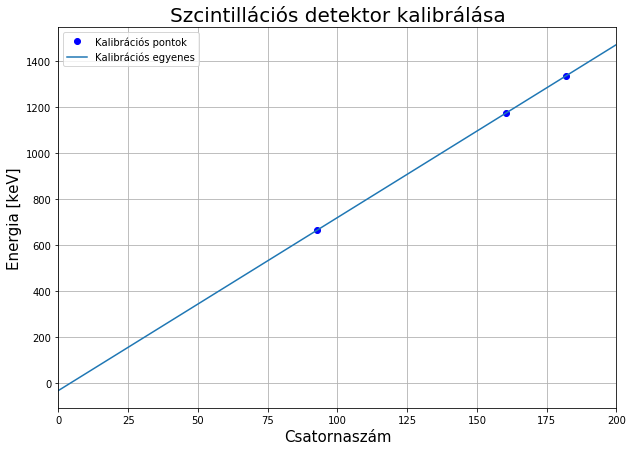

In [72]:
plot(mid,energ,'bo',label='Kalibrációs pontok')
mm=[0,200]
plot(mm,polyval(z,mm),label='Kalibrációs egyenes')
ylabel('Energia [keV]',fontsize=15)
xlabel('Csatornaszám',fontsize=15)
title('Szcintillációs detektor kalibrálása',fontsize=20)
xlim(0,200)
legend()
grid(True)
savefig('./Szcint_kalib.png',bbox_inches='tight')

### HPG kalibrálása

In [127]:
mid=[714.710,1267.263,1439.531]
err=[0.017,0.023,0.020]
energ=[662,1173,1333]

In [128]:
z=polyfit(mid,energ,1)

In [129]:
z

array([ 0.92551436,  0.44963893])

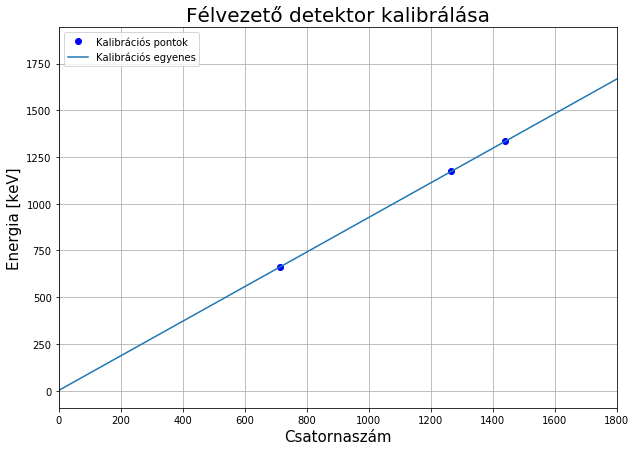

In [95]:
plot(mid,energ,'bo',label='Kalibrációs pontok')
mm=[0,2000]
plot(mm,polyval(z,mm),label='Kalibrációs egyenes')
ylabel('Energia [keV]',fontsize=15)
xlabel('Csatornaszám',fontsize=15)
title('Félvezető detektor kalibrálása',fontsize=20)
xlim(0,1800)
legend(loc='upper left')
grid(True)
#savefig('./HPG_kalib.png',bbox_inches='tight')

In [36]:
data=loadtxt('./Gam_NaCl.dat')
data2=loadtxt('./Gam_KCl.dat')

In [38]:
csat=linspace(1,len(data),len(data))
energia=7.522*csat-33.903

In [37]:
len(data2)

510

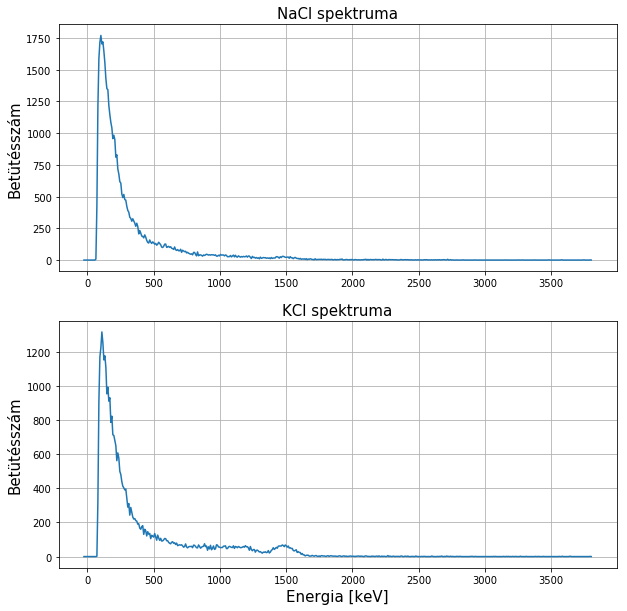

In [47]:
figsize(10,10)
fig,(ax1,ax2)=plt.subplots(2,1)
ax1.plot(energia,data)
ax1.grid(True)
ax1.set_ylabel('Betütésszám',fontsize=15)
ax1.set_title('NaCl spektruma',fontsize=15)
ax2.plot(energia,data2)
ax2.set_ylabel('Betütésszám',fontsize=15)
ax2.set_xlabel('Energia [keV]',fontsize=15)
ax2.set_title('KCl spektruma',fontsize=15)
ax2.grid(True)
savefig('Na-K_spek.png',bbox_inches='tight')

In [56]:
def gauss_lin(x,a,x0,sigma,c,b):
    return a*exp(-(x-x0)**2/(2*sigma**2))+c*x+b

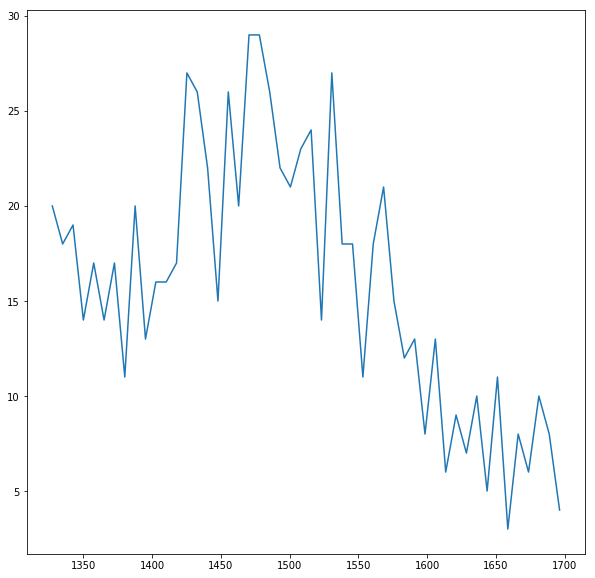

In [53]:
plot(energia[180:230],data[180:230])

In [57]:
popt6,pcov6 = curve_fit(gauss_lin,energia[180:230],data[180:230],p0=[10,1500,50,-10,100])
popt6,pcov6

(array([  1.27124444e+01,   1.49089341e+03,   5.45919762e+01,
         -2.80517589e-02,   5.37305721e+01]),
 array([[  2.28574989e+00,  -1.37869708e+00,   1.26166303e+00,
           2.16774132e-03,  -4.21303985e+00],
        [ -1.37869708e+00,   5.36032927e+01,  -1.03376106e+01,
          -2.30012939e-02,   3.61246106e+01],
        [  1.26166303e+00,  -1.03376106e+01,   8.52476319e+01,
           1.62383135e-02,  -3.21316781e+01],
        [  2.16774132e-03,  -2.30012939e-02,   1.62383135e-02,
           3.53270149e-05,  -5.55482862e-02],
        [ -4.21303985e+00,   3.61246106e+01,  -3.21316781e+01,
          -5.55482862e-02,   8.84576055e+01]]))

In [74]:
for i in range (5):
    print(sqrt(pcov6[i,i]))

1.51186966543
7.32142695633
9.23296441687
0.00594365332568
9.40519034951


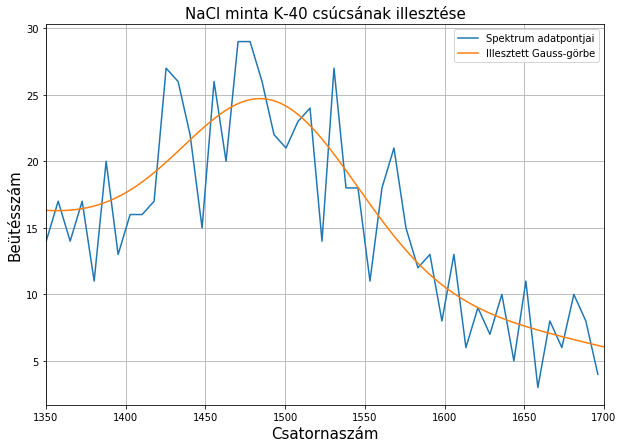

In [60]:
figsize(10,7)
mm=linspace(1300,1700,1000)
plot(energia[180:230],data[180:230],label='Spektrum adatpontjai')
plot(mm, gauss_lin(mm, *popt6),label='Illesztett Gauss-görbe')
xlim(1350,1700)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('NaCl minta K-40 csúcsának illesztése',fontsize=15)
plt.legend()
grid(True)

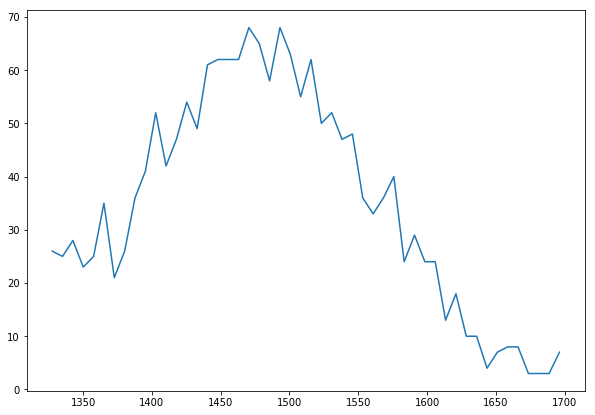

In [61]:
plot(energia[180:230],data2[180:230])

In [64]:
popt7,pcov7 = curve_fit(gauss_lin,energia[180:230],data2[180:230],p0=[60,1500,50,-10,100])
popt7,pcov7

(array([  5.27548073e+01,   1.48408847e+03,   7.13178369e+01,
         -4.03737729e-02,   7.13632499e+01]),
 array([[  6.47627605e+00,  -3.54169541e+00,   7.18385155e+00,
           1.59923474e-02,  -2.94597621e+01],
        [ -3.54169541e+00,   1.02111329e+01,  -5.83520197e+00,
          -2.51437486e-02,   4.14263958e+01],
        [  7.18385155e+00,  -5.83520197e+00,   2.11463731e+01,
           2.61836467e-02,  -4.96072893e+01],
        [  1.59923474e-02,  -2.51437486e-02,   2.61836467e-02,
           1.06695406e-04,  -1.76870264e-01],
        [ -2.94597621e+01,   4.14263958e+01,  -4.96072893e+01,
          -1.76870264e-01,   2.96942029e+02]]))

In [75]:
for i in range (5):
    print(sqrt(pcov7[i,i]))

2.54485285344
3.19548633247
4.59851857452
0.0103293468392
17.2320059441


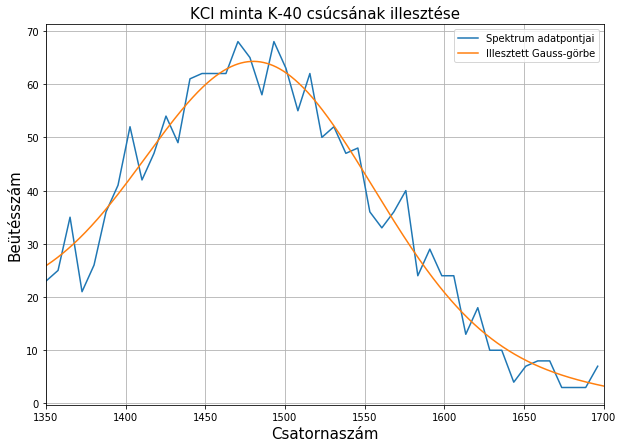

In [65]:
figsize(10,7)
mm=linspace(1300,1700,1000)
plot(energia[180:230],data2[180:230],label='Spektrum adatpontjai')
plot(mm, gauss_lin(mm, *popt7),label='Illesztett Gauss-görbe')
xlim(1350,1700)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('KCl minta K-40 csúcsának illesztése',fontsize=15)
plt.legend()
grid(True)

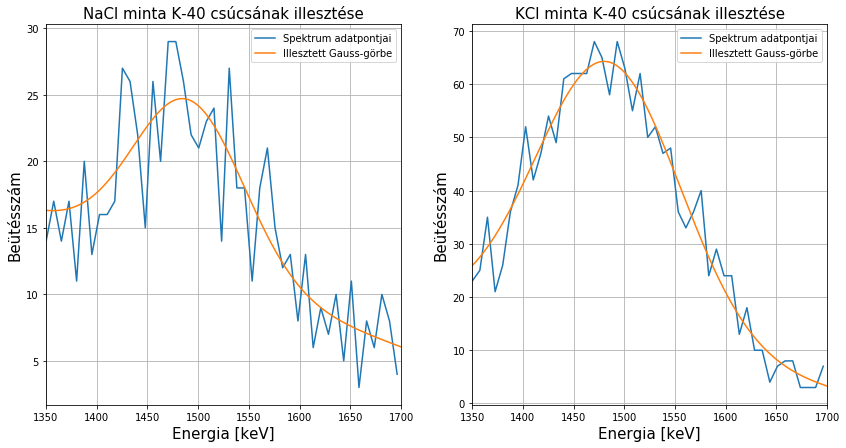

In [72]:
figsize(14,7)
mm=linspace(1300,1700,1000)
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(energia[180:230],data[180:230],label='Spektrum adatpontjai')
ax1.plot(mm, gauss_lin(mm, *popt6),label='Illesztett Gauss-görbe')
ax1.set_xlim(1350,1700)
ax1.set_xlabel('Energia [keV]',fontsize=15)
ax1.set_ylabel('Beütésszám',fontsize=15)
ax1.set_title('NaCl minta K-40 csúcsának illesztése',fontsize=15)
ax1.legend()
ax1.grid(True)

ax2.plot(energia[180:230],data2[180:230],label='Spektrum adatpontjai')
ax2.plot(mm, gauss_lin(mm, *popt7),label='Illesztett Gauss-görbe')
ax2.set_xlim(1350,1700)
ax2.set_xlabel('Energia [keV]',fontsize=15)
ax2.set_ylabel('Beütésszám',fontsize=15)
ax2.set_title('KCl minta K-40 csúcsának illesztése',fontsize=15)
ax2.legend()
ax2.grid(True)

savefig('./K40_fits.png',bbox_inches='tight')

In [86]:
0.5*12.712/52.755*54.592/71.317

0.09222660041976374

In [84]:
sqrt((1.512/12.712)**2+(2.545/52.755)**2+(9.233/54.592)**2+(4.599/71.317)**2)*0.105

0.023298941267540344

In [85]:
sqrt((1.512/12.712)**2+(2.545/52.755)**2+(9.233/54.592)**2+(4.599/71.317)**2+1/24.8+1/63.4)*0.105

0.03407774955678302

In [120]:
m=linspace(1,len(data3),len(data3))
energia=0.926*m+ 0.450

In [160]:
0.926*714.710+ 0.450

662.2714600000002

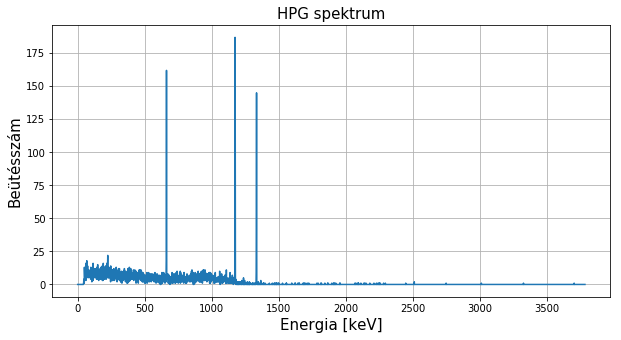

In [122]:
figsize(10,5)
plot(energia,data3)
xlabel('Energia [keV]',fontsize=15)
ylabel('Beütésszám',fontsize=15)
grid(True)
title('HPG spektrum',fontsize=15)

In [140]:
efelbont=1.935

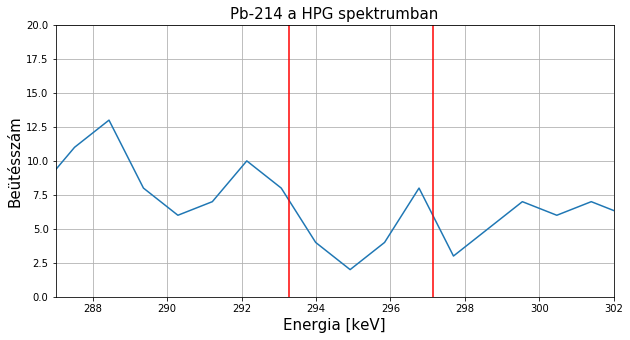

In [154]:
figsize(10,5)
plot(energia,data3)
xlabel('Energia [keV]',fontsize=15)
ylabel('Beütésszám',fontsize=15)
grid(True)
title('Pb-214 a HPG spektrumban',fontsize=15)
xlim(287,302)
ylim(0,20)
axvline(x=295.2+efelbont,color='red')
axvline(x=295.2-efelbont,color='red')
savefig('./Pb_2csucs.png',bbox_inches='tight')

In [157]:
print(energia[300:340])

[ 279.176  280.102  281.028  281.954  282.88   283.806  284.732  285.658
  286.584  287.51   288.436  289.362  290.288  291.214  292.14   293.066
  293.992  294.918  295.844  296.77   297.696  298.622  299.548  300.474
  301.4    302.326  303.252  304.178  305.104  306.03   306.956  307.882
  308.808  309.734  310.66   311.586  312.512  313.438  314.364  315.29 ]


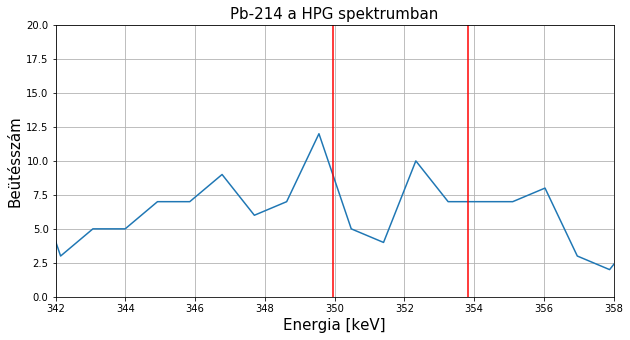

In [155]:
figsize(10,5)
plot(energia,data3)
xlabel('Energia [keV]',fontsize=15)
ylabel('Beütésszám',fontsize=15)
grid(True)
title('Pb-214 a HPG spektrumban',fontsize=15)
xlim(342,358)
ylim(0,20)
axvline(x=351.9+efelbont,color='red')
axvline(x=351.9-efelbont,color='red')
savefig('./Pb_2csucs.png',bbox_inches='tight')

In [161]:
print(energia[345:390])

[ 320.846  321.772  322.698  323.624  324.55   325.476  326.402  327.328
  328.254  329.18   330.106  331.032  331.958  332.884  333.81   334.736
  335.662  336.588  337.514  338.44   339.366  340.292  341.218  342.144
  343.07   343.996  344.922  345.848  346.774  347.7    348.626  349.552
  350.478  351.404  352.33   353.256  354.182  355.108  356.034  356.96
  357.886  358.812  359.738  360.664  361.59 ]


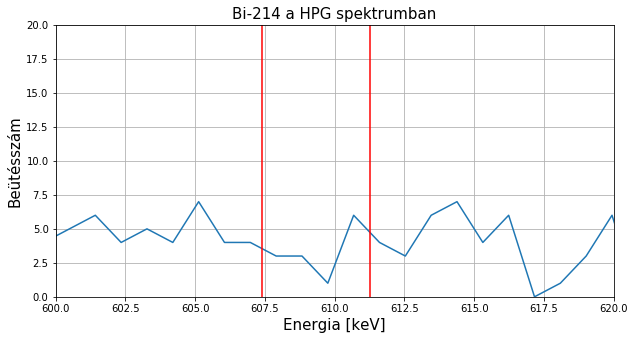

In [156]:
figsize(10,5)
plot(energia,data3)
xlabel('Energia [keV]',fontsize=15)
ylabel('Beütésszám',fontsize=15)
grid(True)
title('Bi-214 a HPG spektrumban',fontsize=15)
xlim(600,620)
ylim(0,20)
axvline(x=609.318+efelbont,color='red')
axvline(x=609.318-efelbont,color='red')
savefig('./Bi_csucs.png',bbox_inches='tight')

In [163]:
print(energia[650:690])

[ 603.276  604.202  605.128  606.054  606.98   607.906  608.832  609.758
  610.684  611.61   612.536  613.462  614.388  615.314  616.24   617.166
  618.092  619.018  619.944  620.87   621.796  622.722  623.648  624.574
  625.5    626.426  627.352  628.278  629.204  630.13   631.056  631.982
  632.908  633.834  634.76   635.686  636.612  637.538  638.464  639.39 ]
